<div align="center">

# Final project

ECON 294A

Jiajun Xu

</div>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

#Load the "finaldata"
file_path = "C:/Users/ROG/OneDrive/桌面/Econ_294A_python/final project/finaldata.xlsx"

#Load the data1(Convergence regression)
data1 = pd.read_excel(file_path, sheet_name=0)

In [3]:
#Filter data for GDP per capita and GDP per capita growth rate
gdp_per_capita = data1[data1["Series Name"] == "GDP per capita (constant 2015 US$)"]
gdp_per_capita_growth = data1[data1["Series Name"] == "GDP per capita growth (annual %)"]
gdp_per_capita = gdp_per_capita.set_index(["Country Name", "Country Code", "Series Name"]).T
gdp_per_capita.columns = gdp_per_capita.columns.droplevel([1, 2])
gdp_per_capita = gdp_per_capita.dropna(axis=1, how="all")

#Ensure the year columns are integers
gdp_per_capita.index = gdp_per_capita.index.astype(int)

#Select start and end years
start_year = 1971
end_year = 2022

#Convert to numeric and remove N/A
gdp_per_capita = gdp_per_capita.apply(pd.to_numeric, errors="coerce")
gdp_per_capita = gdp_per_capita.dropna()

d:\Anaconda\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\ROG\AppData\Local\Temp\ipykernel_28524\2270470737.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(np.log(gdp_initial[i]), gdp_diff[i], country)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     21.82
Date:                Sat, 15 Jun 2024   Prob (F-statistic):           0.000437
Time:                        20:09:29   Log-Likelihood:                -11.551
No. Observations:                  15   AIC:                             27.10
Df Residuals:                      13   BIC:                             28.52
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.1283      0.843      6.085      0.0

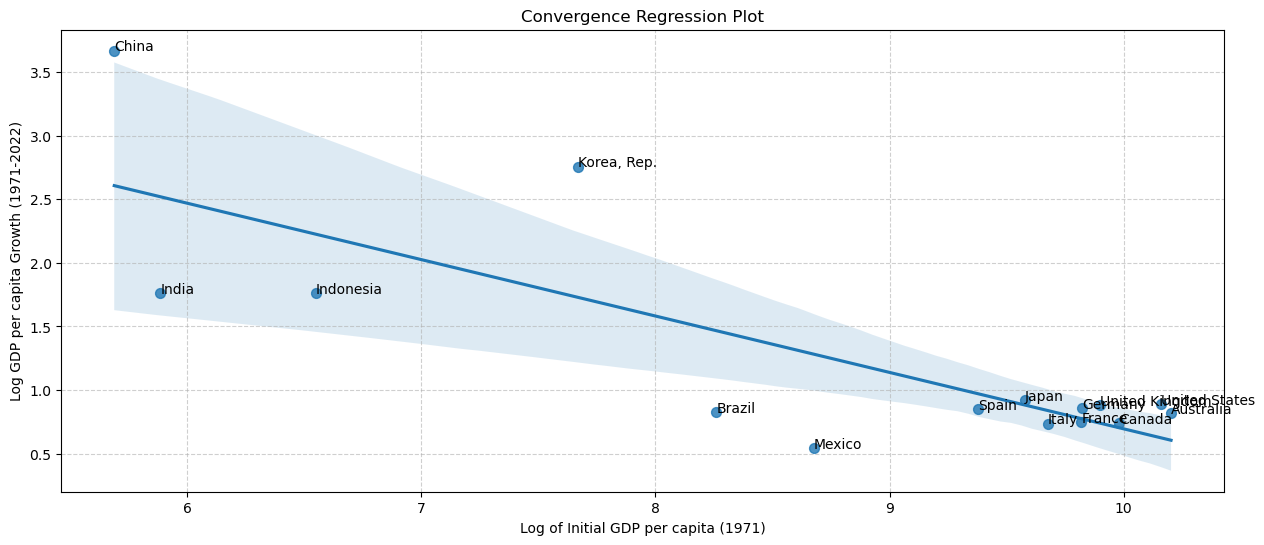

In [4]:
#Calculate the log GDP difference
gdp_initial = gdp_per_capita.loc[start_year]
gdp_final = gdp_per_capita.loc[end_year]
gdp_diff = np.log(gdp_final) - np.log(gdp_initial)

#Perform convergence regression
X = sm.add_constant(np.log(gdp_initial))
y = gdp_diff
model = sm.OLS(y, X).fit()

#Print regression results
print(model.summary())

#Plot scatter plot and regression line
plt.figure(figsize=(15, 6))
sns.regplot(x=np.log(gdp_initial), y=gdp_diff, scatter_kws={'s': 50})
for i, country in enumerate(gdp_diff.index):
    plt.text(np.log(gdp_initial[i]), gdp_diff[i], country)

plt.xlabel(f"Log of Initial GDP per capita ({start_year})")
plt.ylabel(f"Log GDP per capita Growth ({start_year}-{end_year})")
plt.title("Convergence Regression Plot")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

    The coefficient of 1971 (Log of Initial GDP per capita): -0.4433, indicating a significant negative relationship between initial GDP and its growth.
    This plot shows a negative slope, indicating that countries with a lower initial GDP per capita in 1971 tend to have higher GDP per capita growth rates 
    from 1971 to 2022, such as China, Korea,Rep and India, that supporting the convergence hypothesis.

In [5]:
#Prepare the GDP per capita growth rates data
gdp_per_capita_growth = gdp_per_capita_growth.set_index(["Country Name", "Country Code", "Series Name"]).T
gdp_per_capita_growth.columns = gdp_per_capita_growth.columns.droplevel([1, 2])
gdp_per_capita_growth = gdp_per_capita_growth.dropna(axis=1, how="all")

#Ensure the year columns are integers
gdp_per_capita_growth.index = gdp_per_capita_growth.index.astype(int)

#Convert to numeric and remove invalid values
gdp_per_capita_growth = gdp_per_capita_growth.apply(pd.to_numeric, errors='coerce')
gdp_per_capita_growth = gdp_per_capita_growth.dropna()

#Define the groups
group1 = ["United States", "China", "Japan", "Germany", "India"]
group2 = ["United Kingdom", "France", "Canada", "Italy", "Brazil"]
group3 = ["Australia", "Korea, Rep.", "Spain", "Mexico", "Indonesia"]

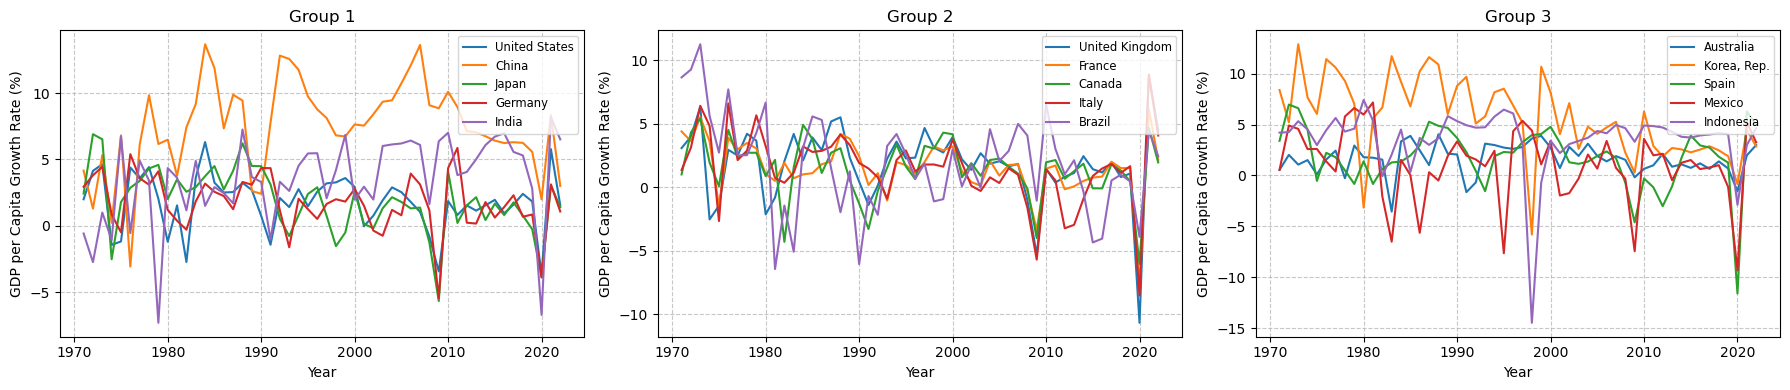

In [6]:
#Plotting function
def plot_growth_rate(ax, group, title):
    for country in group:
        ax.plot(gdp_per_capita_growth.index, gdp_per_capita_growth[country], label=country)
    ax.set_xlabel("Year")
    ax.set_ylabel("GDP per Capita Growth Rate (%)")
    ax.set_title(title)
    ax.legend(loc="upper right", fontsize="small", ncol=1)
    ax.grid(True, linestyle='--', alpha=0.7)

fig, axs = plt.subplots(1, 3, figsize=(18, 4))

#Plot each group
plot_growth_rate(axs[0], group1, "Group 1")
plot_growth_rate(axs[1], group2, "Group 2")
plot_growth_rate(axs[2], group3, "Group 3")

plt.tight_layout()
plt.show()

These plots show the growth rate of real Gdp per capita for each country from 1971 to 2022, which also supports the results of the regression analysis

Next, exploring the influence of age structure on gdp growth rate.

In [7]:
#Load the data2(The influence of age structure on gdp growth)
data2 = pd.read_excel(file_path,sheet_name=1)

#Check the data format
print(data2.columns)

# Rename column
data2.columns = ["Country Name", "Country Code", "Series Name", "1971", "1972", "1973", "1974", "1975", "1976", "1977", "1978", "1979", "1980", 
                "1981", "1982", "1983", "1984", "1985", "1986", "1987", "1988", "1989", "1990", "1991", "1992", "1993", "1994", "1995", "1996", 
                "1997", "1998", "1999", "2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", 
                "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022"]

# Convert data to long format
data_long = pd.melt(data2, id_vars=["Country Name", "Country Code", "Series Name"], var_name="Year", value_name="Value")


Index(['Country Name', 'Country Code',  'Series Name',           1971,
                 1972,           1973,           1974,           1975,
                 1976,           1977,           1978,           1979,
                 1980,           1981,           1982,           1983,
                 1984,           1985,           1986,           1987,
                 1988,           1989,           1990,           1991,
                 1992,           1993,           1994,           1995,
                 1996,           1997,           1998,           1999,
                 2000,           2001,           2002,           2003,
                 2004,           2005,           2006,           2007,
                 2008,           2009,           2010,           2011,
                 2012,           2013,           2014,           2015,
                 2016,           2017,           2018,           2019,
                 2020,           2021,           2022],
      dtype='object')

In [8]:
import statsmodels.api as sm

#Process the data2 for regression
data_wide = data_long.pivot_table(index=["Country Name", "Country Code", "Year"], columns="Series Name", values="Value").reset_index()
data_wide.columns = ["Country Name", "Country Code", "Year", "GDP Growth", "Population 0-14", "Population 15-64", "Population 65+"]

#Remove N/A
data_wide = data_wide.dropna()

#OLS regression
X = data_wide[["Population 0-14", "Population 15-64", "Population 65+"]]
y = data_wide["GDP Growth"]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

#Print the regression results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             GDP Growth   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     111.0
Date:                Sat, 15 Jun 2024   Prob (F-statistic):           4.06e-43
Time:                        20:09:41   Log-Likelihood:                -1997.7
No. Observations:                 780   AIC:                             4001.
Df Residuals:                     777   BIC:                             4015.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0014      0.000  

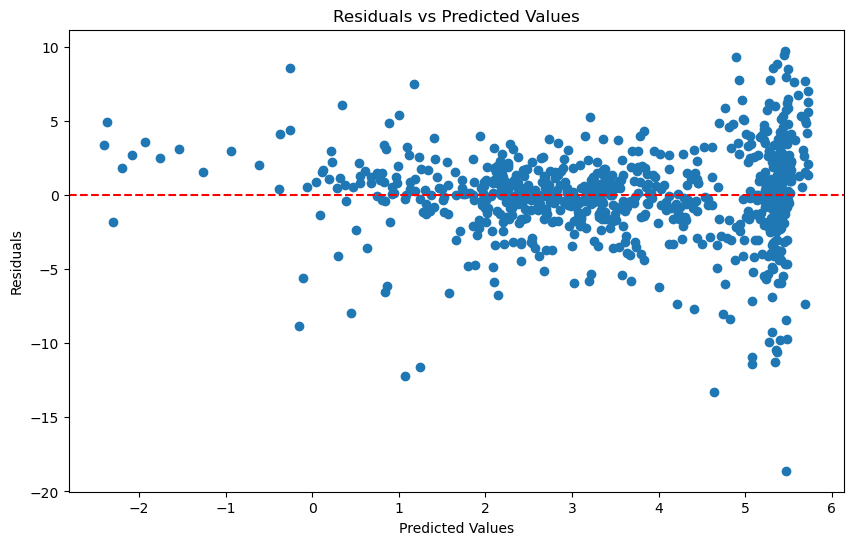

In [9]:
#Predicted value and residual
y_pred = model.fittedvalues
residuals = model.resid

#Create a residual graph
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()


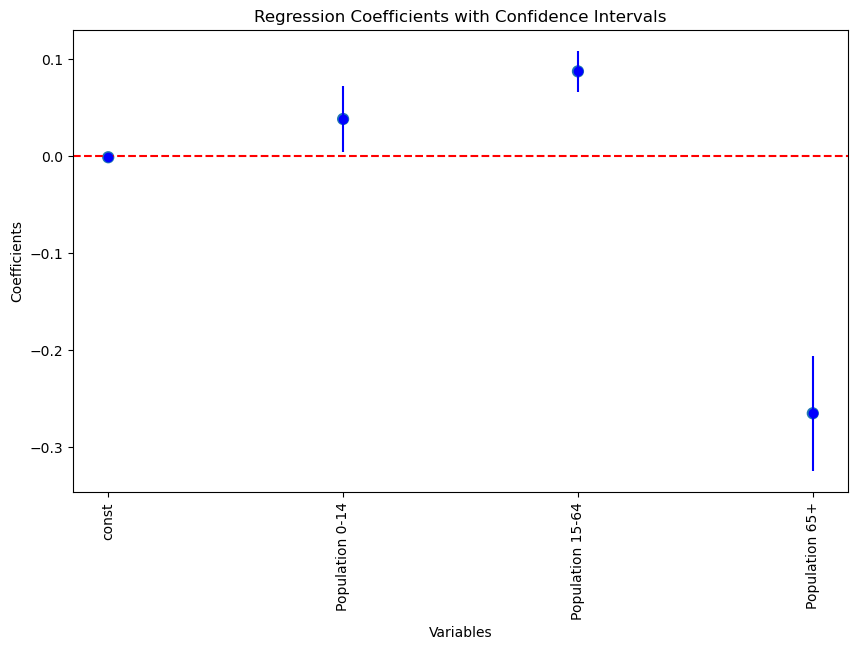

In [10]:
#Get regression coefficient and CI
coef = model.params
conf = model.conf_int()
conf['coef'] = coef

#Create a regression coefficient graph
plt.figure(figsize=(10, 6))
sns.pointplot(x=conf.index, y='coef', data=conf, join=False)
plt.errorbar(x=conf.index, y=conf['coef'], yerr=(conf[1] - conf[0])/2, fmt='o', color='blue')
plt.axhline(y=0, color='r', linestyle='--')
plt.xticks(rotation=90)
plt.xlabel('Variables')
plt.ylabel('Coefficients')
plt.title('Regression Coefficients with Confidence Intervals')
plt.show()


The regression results suggest that the population age structure has a significant impact on GDP growth. Specifically, a higher proportion of the population aged 15-64 is associated with higher GDP growth, while a higher proportion of those aged 65 and above is associated with lower GDP growth. The model explains 22.2% of the variability in GDP growth, and all coefficients are statistically significant. 

According to the obtained data, choosing birth rate as an instrumental variable and run a 2SLS regression.

In [11]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.sandbox.regression.gmm import IV2SLS

#Load the data3(2SLS)
data3 = pd.read_excel(file_path,sheet_name=2)

#Check the data format
print(data3.columns)

# Rename column
data3.columns = ["Country Name", "Country Code", "Series Name", "1971", "1972", "1973", "1974", "1975", "1976", "1977", "1978", "1979", "1980", 
                "1981", "1982", "1983", "1984", "1985", "1986", "1987", "1988", "1989", "1990", "1991", "1992", "1993", "1994", "1995", "1996", 
                "1997", "1998", "1999", "2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", 
                "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022"]

# Convert data to long format
data3_long = pd.melt(data3, id_vars=["Country Name", "Country Code", "Series Name"], var_name="Year", value_name="Value")

Index(['Country Name', 'Country Code',  'Series Name',           1971,
                 1972,           1973,           1974,           1975,
                 1976,           1977,           1978,           1979,
                 1980,           1981,           1982,           1983,
                 1984,           1985,           1986,           1987,
                 1988,           1989,           1990,           1991,
                 1992,           1993,           1994,           1995,
                 1996,           1997,           1998,           1999,
                 2000,           2001,           2002,           2003,
                 2004,           2005,           2006,           2007,
                 2008,           2009,           2010,           2011,
                 2012,           2013,           2014,           2015,
                 2016,           2017,           2018,           2019,
                 2020,           2021,           2022],
      dtype='object')

In [12]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.sandbox.regression.gmm import IV2SLS

#Process data3 for 2SLS (Choose birth rate as instrumental variable)
data3_long = pd.melt(data3, id_vars=['Country Name', 'Country Code', 'Series Name'], var_name='Year', value_name='Value')
data3_wide = data3_long.pivot_table(index=['Country Name', 'Country Code', 'Year'], columns='Series Name', values='Value').reset_index()

In [13]:
#Define instrumental variables
instrument_vars = ['Birth rate, crude (per 1,000 people)']

#Predit proportion of population aged 0-14
X_0_14 = sm.add_constant(data3_wide[instrument_vars])
y_0_14 = data3_wide['Population ages 0-14 (% of total population)']
model_0_14 = sm.OLS(y_0_14, X_0_14).fit()
data3_wide['Population 0-14_pred'] = model_0_14.predict(X_0_14)

#Predit proportion of population aged 15-64
X_15_64 = sm.add_constant(data3_wide[instrument_vars])
y_15_64 = data3_wide['Population ages 15-64 (% of total population)']
model_15_64 = sm.OLS(y_15_64, X_15_64).fit()
data3_wide['Population 15-64_pred'] = model_15_64.predict(X_15_64)

#Predit proportion of population aged 65+
X_65_above = sm.add_constant(data3_wide[instrument_vars])
y_65_above = data3_wide['Population ages 65 and above (% of total population)']
model_65_above = sm.OLS(y_65_above, X_65_above).fit()
data3_wide['Population 65+_pred'] = model_65_above.predict(X_65_above)


In [15]:
#Define arguments for the second stage
X_second_stage = data3_wide[['Population 0-14_pred', 'Population 15-64_pred', 'Population 65+_pred']]
X_second_stage = sm.add_constant(X_second_stage)
y_second_stage = data3_wide['GDP growth (annual %)']

#Run second-staged regression
model_2sls = IV2SLS(y_second_stage, X_second_stage, data3_wide[instrument_vars]).fit()
print(model_2sls.summary())


                            IV2SLS Regression Results                            
Dep. Variable:     GDP growth (annual %)   R-squared:                     -10.241
Model:                            IV2SLS   Adj. R-squared:                -10.284
Method:                        Two Stage   F-statistic:                 1.614e-13
                           Least Squares   Prob (F-statistic):               1.00
Date:                   Sat, 15 Jun 2024                                         
Time:                           20:10:03                                         
No. Observations:                    780                                         
Df Residuals:                        776                                         
Df Model:                              3                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


d:\Anaconda\Lib\site-packages\statsmodels\sandbox\regression\gmm.py:290: RuntimeWarning: invalid value encountered in sqrt
  condno = np.sqrt(eigvals[-1]/eigvals[0])
d:\Anaconda\Lib\site-packages\statsmodels\regression\linear_model.py:1883: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(self.cov_params()))


The results of 2SLS regression analysis show that there are some problems in the model. Owing to the data obtained and the choice of instrumental variables that cause this problem, so the size of the data volume and the choice of instrumental variables need to be improved.